##Importing important needed libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

##Importing and Reading the File

In [3]:
data=pd.read_csv('Bengaluru_House_Data.csv')
data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape[0]

13320

In [5]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
#We have have 13320 rows and 9 columns

##Dropping Unnecessasry Columns



*   We are soceity as it necessasarily influence people in buying houses
*   We are dropping availability as it has two types of value:dates without year and textual data(Ready to Move). This makes analysis difficult  
*  We are dropping area_type as it is not needed that much.

In [6]:
data2=data.drop(['society','availability','area_type'], axis="columns") 
data2.shape

(13320, 6)

##Exploratory Data Analysis

In [7]:
#Checking for empty values
data2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
'''imputing most_frquent(mode) values of balcony as it is a factor in price calculation and its loss can lead to a lot of data loss.''' 

'imputing most_frquent(mode) values of balcony as it is a factor in price calculation and its loss can lead to a lot of data loss.'

In [9]:
data2["balcony"] = imputer.fit_transform(data2[["balcony"]]).ravel()
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
#Dropping records with empty values
data3=data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
#Checking the number of records left
data3.shape

(13246, 6)

In [12]:
#Checking size for unique values
data3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#As there are too many random values we will create a feature named bhk for uniform calculation
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))
data3.bhk.unique()

C:\Users\CHARVI~1\AppData\Local\Temp/ipykernel_12456/991352735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
data3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
data4=data3.drop(["size"],axis="columns")

In [16]:
data4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
#Now we focus on total sqft because there are 2 errors of 27 and 43 bhk with less sqft value.
data4.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
#There are values in range and now we check the values are float or not.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
data3[~data3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


##Data Cleaning

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [20]:
data5 = data4.copy()
data5.total_sqft = data5.total_sqft.apply(convert_sqft_to_num)
data5 = data5[data5.total_sqft.notnull()]
data5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [21]:
#Adding a feature price per square feet for analysis
data6 = data5.copy()
data6['price_per_sqft'] = data6['price']*100000/data6['total_sqft']
data6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
data6_stats = data6['price_per_sqft'].describe()
data6_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [68]:
data6.to_csv("bhp.csv",index=False)

In [24]:
#Now we focus on the location column
len(data6.location.unique())

1298

In [25]:
#1298 locations are too many.This is a High dimensionality curse. Hence we group some places to 'Others'.
data6.location = data6.location.apply(lambda x: x.strip())
location_stats = data6['location'].value_counts(ascending=False)
location_stats

Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
Akash Nagar                          1
B Y Raveshwara Nagar                 1
Nagarbhavi Garden Villas Layout      1
Ganga Nagar Extension                1
Mallappa Layout                      1
Name: location, Length: 1287, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1047

In [27]:
len(location_stats[location_stats>10])

240

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sadashiva Nagar                    10
Naganathapura                      10
BTM 1st Stage                      10
Thyagaraja Nagar                   10
Sector 1 HSR Layout                10
                                   ..
Akash Nagar                         1
B Y Raveshwara Nagar                1
Nagarbhavi Garden Villas Layout     1
Ganga Nagar Extension               1
Mallappa Layout                     1
Name: location, Length: 1047, dtype: int64

In [29]:
#All locations that are present in the dataset less than 10 times are grouped to Others
data6.location = data6.location.apply(lambda x: "Others" if x in location_stats_less_than_10 else x)
len(data6.location.unique())

241

In [30]:
#Verifying the above steps. Record number 9 is shown as others.
data6.head(15)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Others,1020.0,6.0,2.0,370.00,6,36274.509804


In [31]:
#Using Business Logic
#Assuming that square per feet bedroom to be 300.
data6[data6.total_sqft/data6.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Others,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Others,500.0,3.0,2.0,100.0,3,20000.000000


In [32]:
data6.shape

(13200, 7)

In [33]:
data7 = data6[~(data6.total_sqft/data6.bhk<300)]
data7.shape

(12456, 7)

In [34]:
#Now going to price per sq ft to check for extremely high and low values
data7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
#Outlier removal using SD and Mean
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data8 = remove_pps_outliers(data7)
data8.shape

(10242, 7)

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (12,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

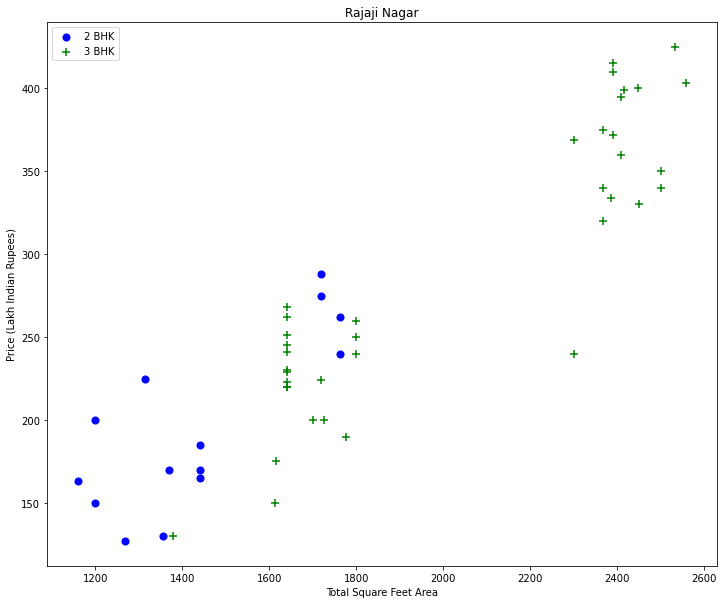

In [37]:
plot_scatter_chart(data8,"Rajaji Nagar")

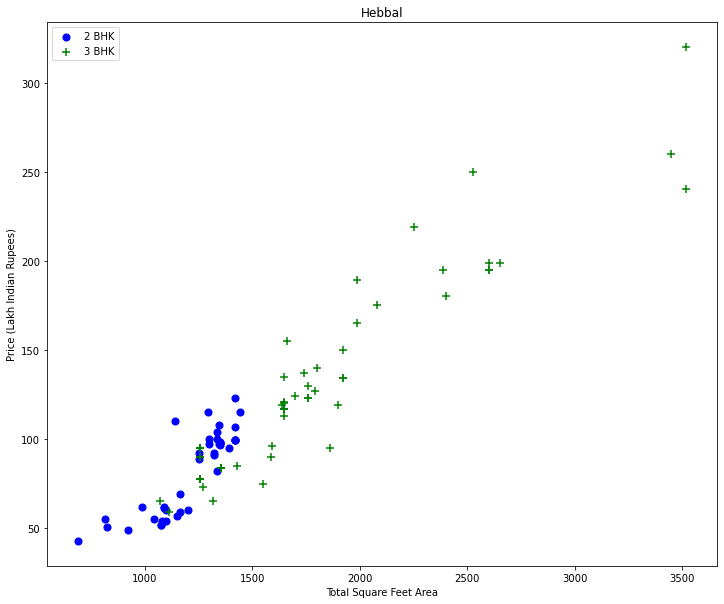

In [38]:
plot_scatter_chart(data8,"Hebbal")

In [39]:
#The above graphs show comparision of 2 and 3 bhk houses in the same location with same square feet area
#At some points we see that price of 2 bhk is higher than 3 bhk
#We will remove  such values

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data9 = remove_bhk_outliers(data7)
data9.shape

(8638, 7)

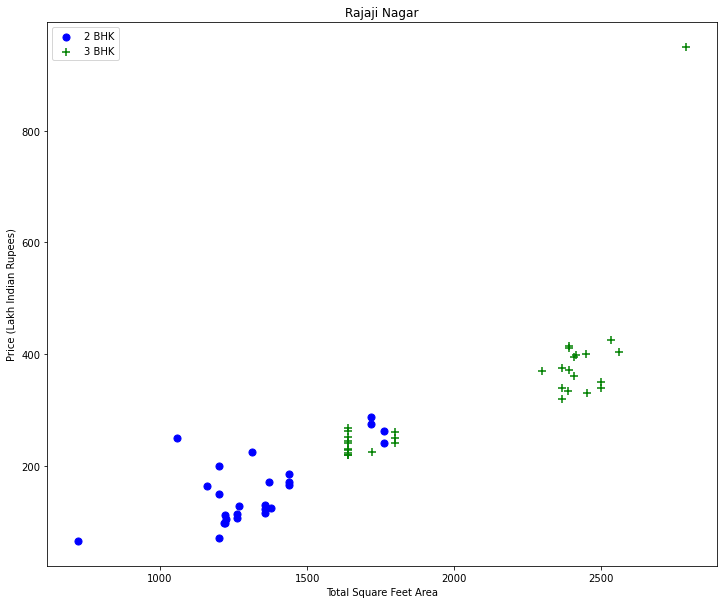

In [41]:
plot_scatter_chart(data9,"Rajaji Nagar")

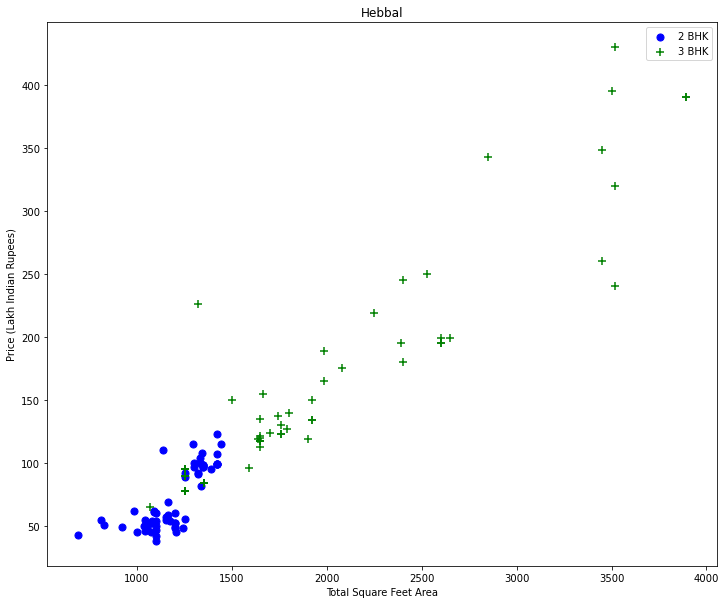

In [42]:
plot_scatter_chart(data9,"Hebbal")

In [43]:
#The improvement in the Dataset

Text(0, 0.5, 'Count')

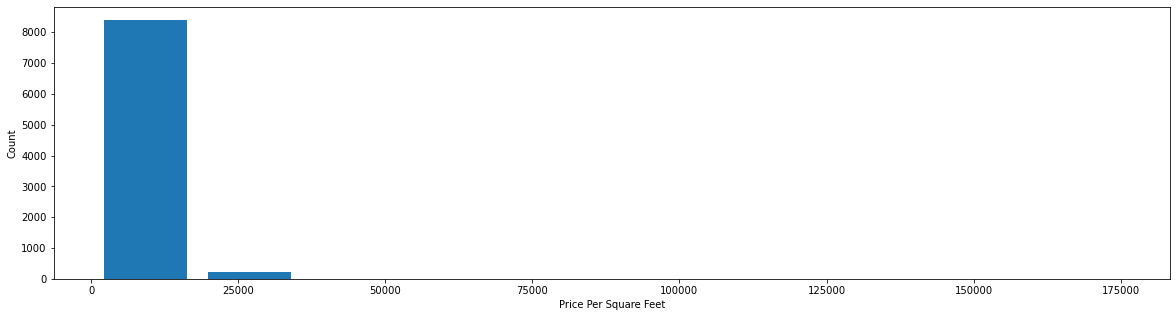

In [44]:
#No. of properties per square fit area
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,5)
plt.hist(data9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
#Exploring bathroom feature and removing extra outliers with high number of bathrooms
data9.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 16., 10., 12.,
       13.])

Text(0, 0.5, 'Count')

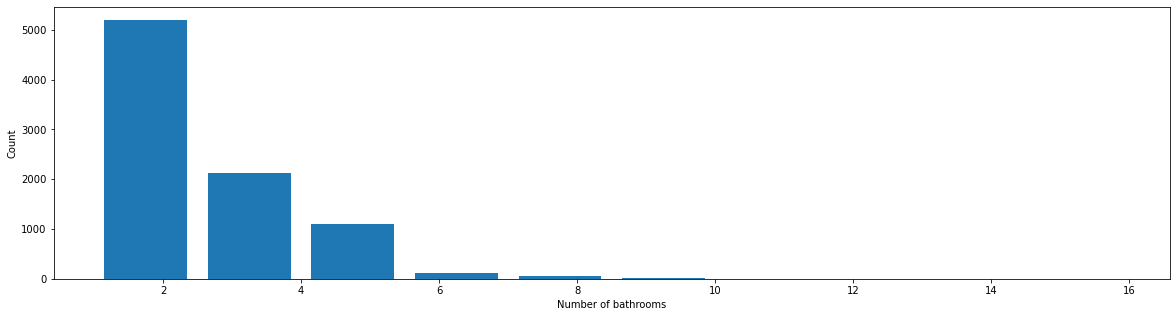

In [46]:
plt.hist(data9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
#Removing values where bhk+2 is lesser than bathrooms
data10 = data9[data9.bath<data9.bhk+2]
data10.shape

(8508, 7)

In [48]:
#Dropping unecessasry features: priceper sqft removed because used for outliers
data11 = data10.drop(['price_per_sqft'],axis='columns')
data11.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4


In [49]:
data11.shape

(8508, 6)

##Final Data Preparation before building the Model

In [50]:
#We convert text location to numbers by one hot encoding system.

In [51]:
dummies = pd.get_dummies(data11.location)
dummies.head(15)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data12 = pd.concat([data11,dummies.drop('Others',axis='columns')],axis='columns')
data12.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Dropping location because we have it in the format of One hot encoding
data13 = data12.drop(['location'],axis='columns') #dropping location cause we have the encoding
data13.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,2.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data13.shape

(8508, 245)

In [ ]:
#Dropping price because it is independent variable

In [56]:
#X is he dependent variable
X = data13.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#y is the independent variable
y=data13.price
y.head()

0     39.07
2     62.00
3     95.00
4     51.00
6    204.00
Name: price, dtype: float64

In [58]:
len(y)

8508

#Linear Regression Model

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6538276888297052

#Use K Fold cross validation to measure accuracy of our LinearRegression model

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.62260289, 0.70771953, 0.71023671, 0.65370938, 0.65445332])

In [ ]:
#Find best model using GridSearchCV

#Using GridSearchCV to find the best model

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.669744,{'normalize': True}
1,lasso,0.605387,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.510092,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
#Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [63]:
#Testing the model for few properties
def predict_price(location,sqft,bath,bhk,balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 2)

77.83543868356045

In [65]:
predict_price('Indira Nagar',1000, 3, 3, 3)

194.93662588792313

In [66]:
#Exporting the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [67]:
#Exporting location and column information to a file that will be useful later on.
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))